# HHA550_Diabetes Prediction Dataset

*Using the Akash Stroke Prediction Dataset as a Guide*

# .CSV Data
[Diabetic Clean Data](data\diabetic_data_CS_V1.csv)

In [351]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [352]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [353]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            classification_report, f1_score

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [354]:
#upload the csv and declare its name to = the csv

#Find the file path to the .csv
    #Then use code below to read .csv
# diabetes = pd.read_csv('x')

diabetes = pd.read_csv('C:/Users/Caroline/Documents/GitHub/hhafall2023_diabetes/data/diabetic_data_CS_V1.csv')

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [355]:
#make sure csv has been assigned to declared name and can be read
diabetes.head()

# this command will give you the first 5 lines of the csv (0,1,2,3,4)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_grouping,readmitted_30
0,3,1,1,999,999,9,1,7,5,0,...,999,999,999,999,999,0,0,0,1,0
1,3,1,2,2,2,5,3,999,6,0,...,999,999,999,999,999,1,1,1,1,0
2,1,1,3,2,2,5,2,999,2,5,...,999,999,999,999,999,0,1,0,1,0
3,3,2,4,2,2,5,2,999,5,1,...,999,999,999,999,999,1,1,0,2,0
4,3,2,5,2,2,5,1,999,6,0,...,999,999,999,999,999,1,1,0,2,0


In [356]:
#check to see the different data types in the csv
diabetes.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
medical_specialty           int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone  

# Exploring and Understanding the Data

### Initial Insights
* That makes it a lot easier to compare the missing value percentages within the columns.
* In our dataset, we have both numerical and categorical variables.
* It is essential to see whether columns are correctly inferred.
* The most important one to look for is our target variable 'readmitted_30'
* 'readmitted_30' is detected as an integer, not as an object.
* Target variable is coded as 1 for yes (readmitted within 30 days) and 0 for no (not readmitted within 30 days)
* There are 46 columns in the dataset that are integers.
* It would be too much  to look at all the columns at once.
* So it is critical to find the important columns that we need to focus on.



**Note: In this case we do not need to know the exact missing percentage of the columns.**

# What are the current problems we have that need to be solved?
* We have too many columns to look at in the dataset.
* We make prediction on the target variable `readmitted_30`
* And we will build a model to get best prediction on the readmitted_30 variable.

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [357]:
y = diabetes['readmitted_30']
print(f'Percentage of patient were readmitted within 30 days: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient were not readmitted within 30 days: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient were readmitted within 30 days: % 11.16 --> (11357 patient)
Percentage of patient were not readmitted within 30 days: % 88.84 --> (90409 patient)


### So what does that all mean?
We have imbalanced data

* Almost 89% of the instances of our target variable are `Not Readmitted`
* 90409 patients did not readmit within 30 days
* 11% of the instances of our target variable are `Readmitted`
* 11357 patients were readmitted within 30 days.

### Visualize stroke

In [358]:
fig = px.histogram(diabetes, x="readmitted_30", title='Readmitted within 30 Days', width=400, height=400)
fig.show()

* The stroke dataset is an example of a so-called imbalanced dataset.
* There are 19 times more people who didn’t have stroke in our data than who had (the non-stroke class dominates the stroke class)
* We can clearly see that: the stroke rate in our data is 0.048
* Which is a strong indicator of class imbalance

## Data Imbalance

* Instances across classes are imbalanced, like in our dataset, we have imbalance data.

* The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

* Some of the metrics (like accuracy) give us misleading results.

* Most of the time in classification problems our interest is to get better predict on the minority class.

* In our example: People were readmitted within 30 days is the minority class.

* Otherwise our machine learning algorithm falsely predicts majority class.

* In our example: No readmittance within 30 days is the majority class

## Decide on Metrics

* This is the first step when approaching a machine learning problem: decide the metric!

* The choice of the wrong metric can mean choosing the wrong algorithm.

* We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC).

* We can use precision and recall too, but AUC combines these two metrics.

* We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

* Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with highly imbalanced data

In [359]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  diag_1              

### Check for Missing Data / Missing Values

In [360]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
race,0,0.0
tolazamide,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0
acarbose,0,0.0
miglitol,0,0.0


<Axes: >

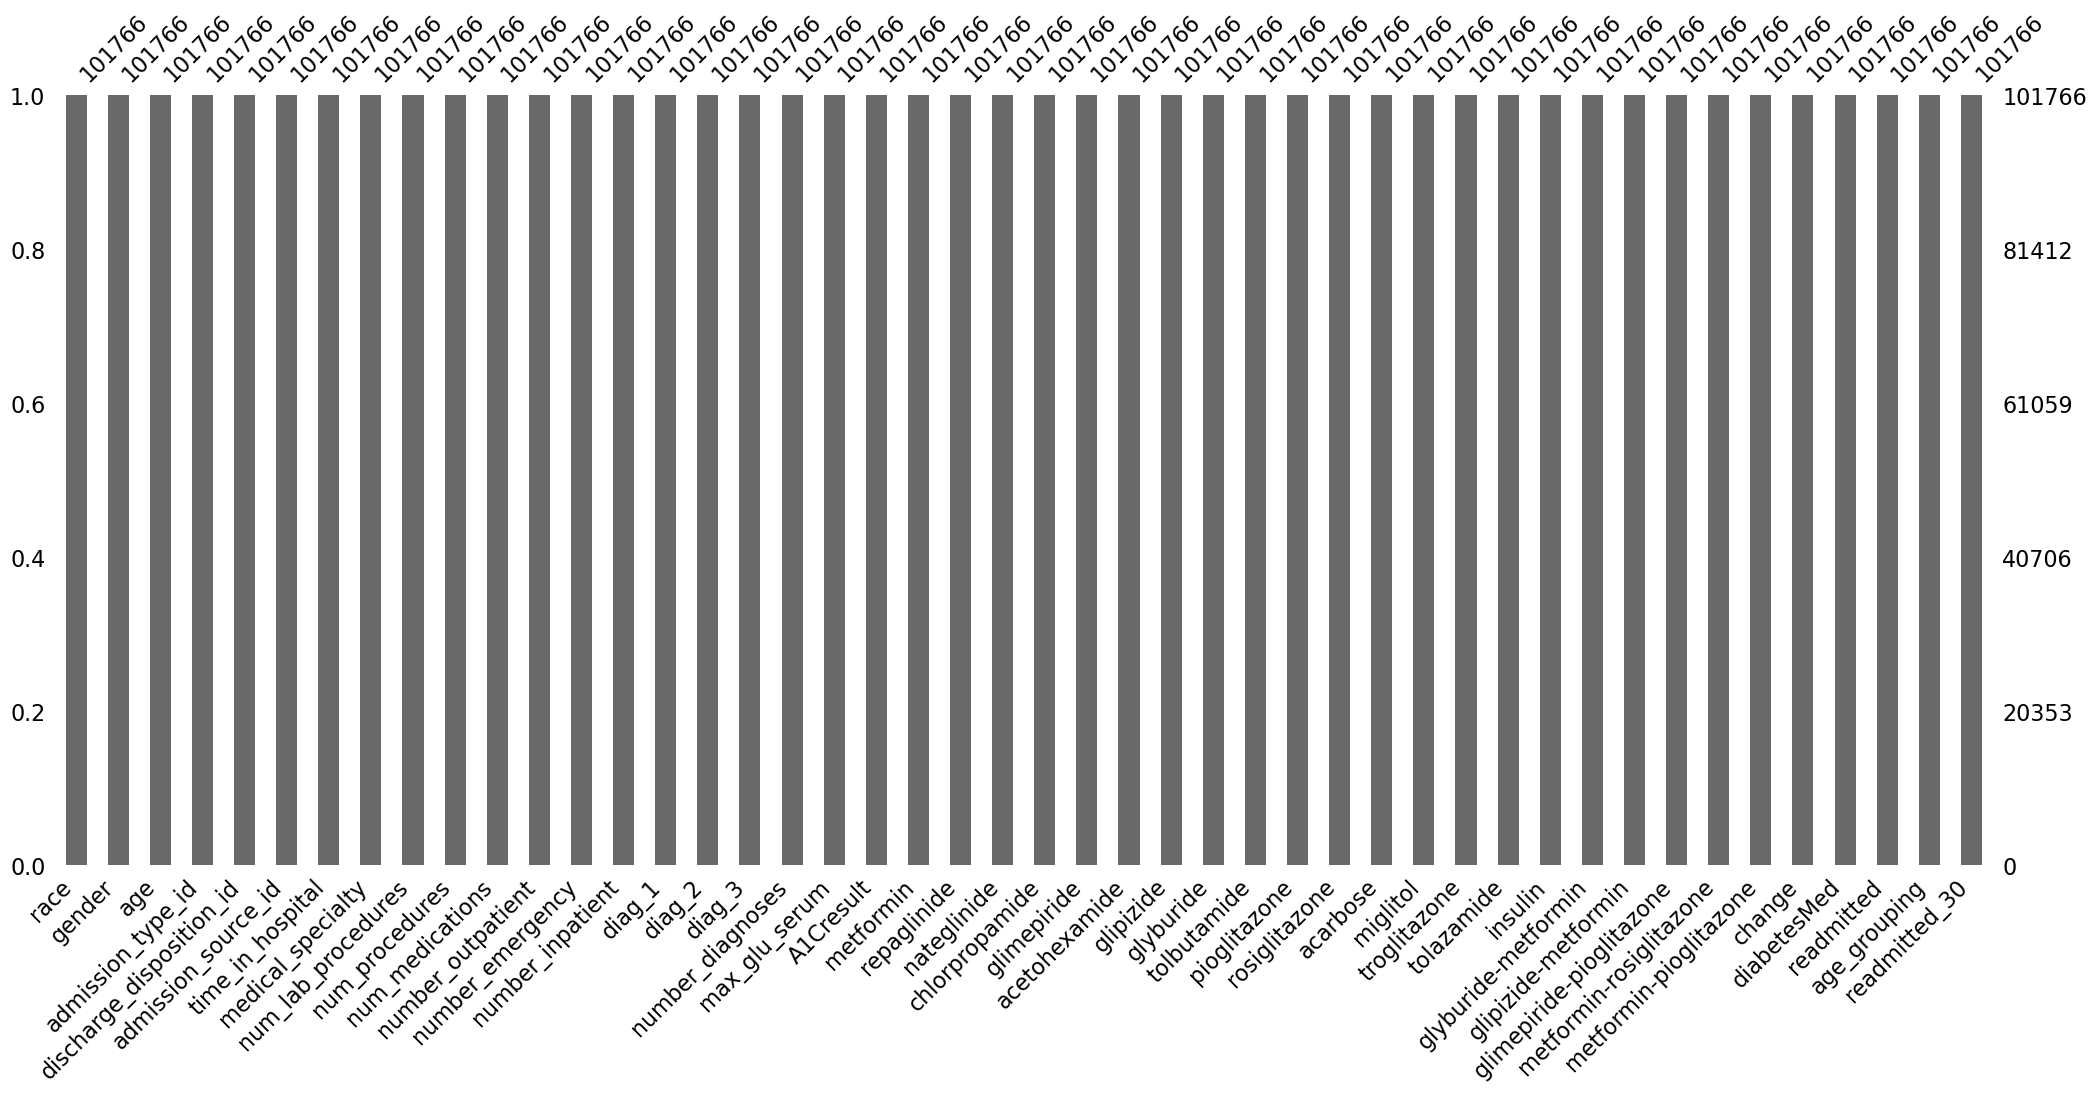

In [361]:
# Visualizing the missing data to get more idea
msno.bar(diabetes)

<Axes: >

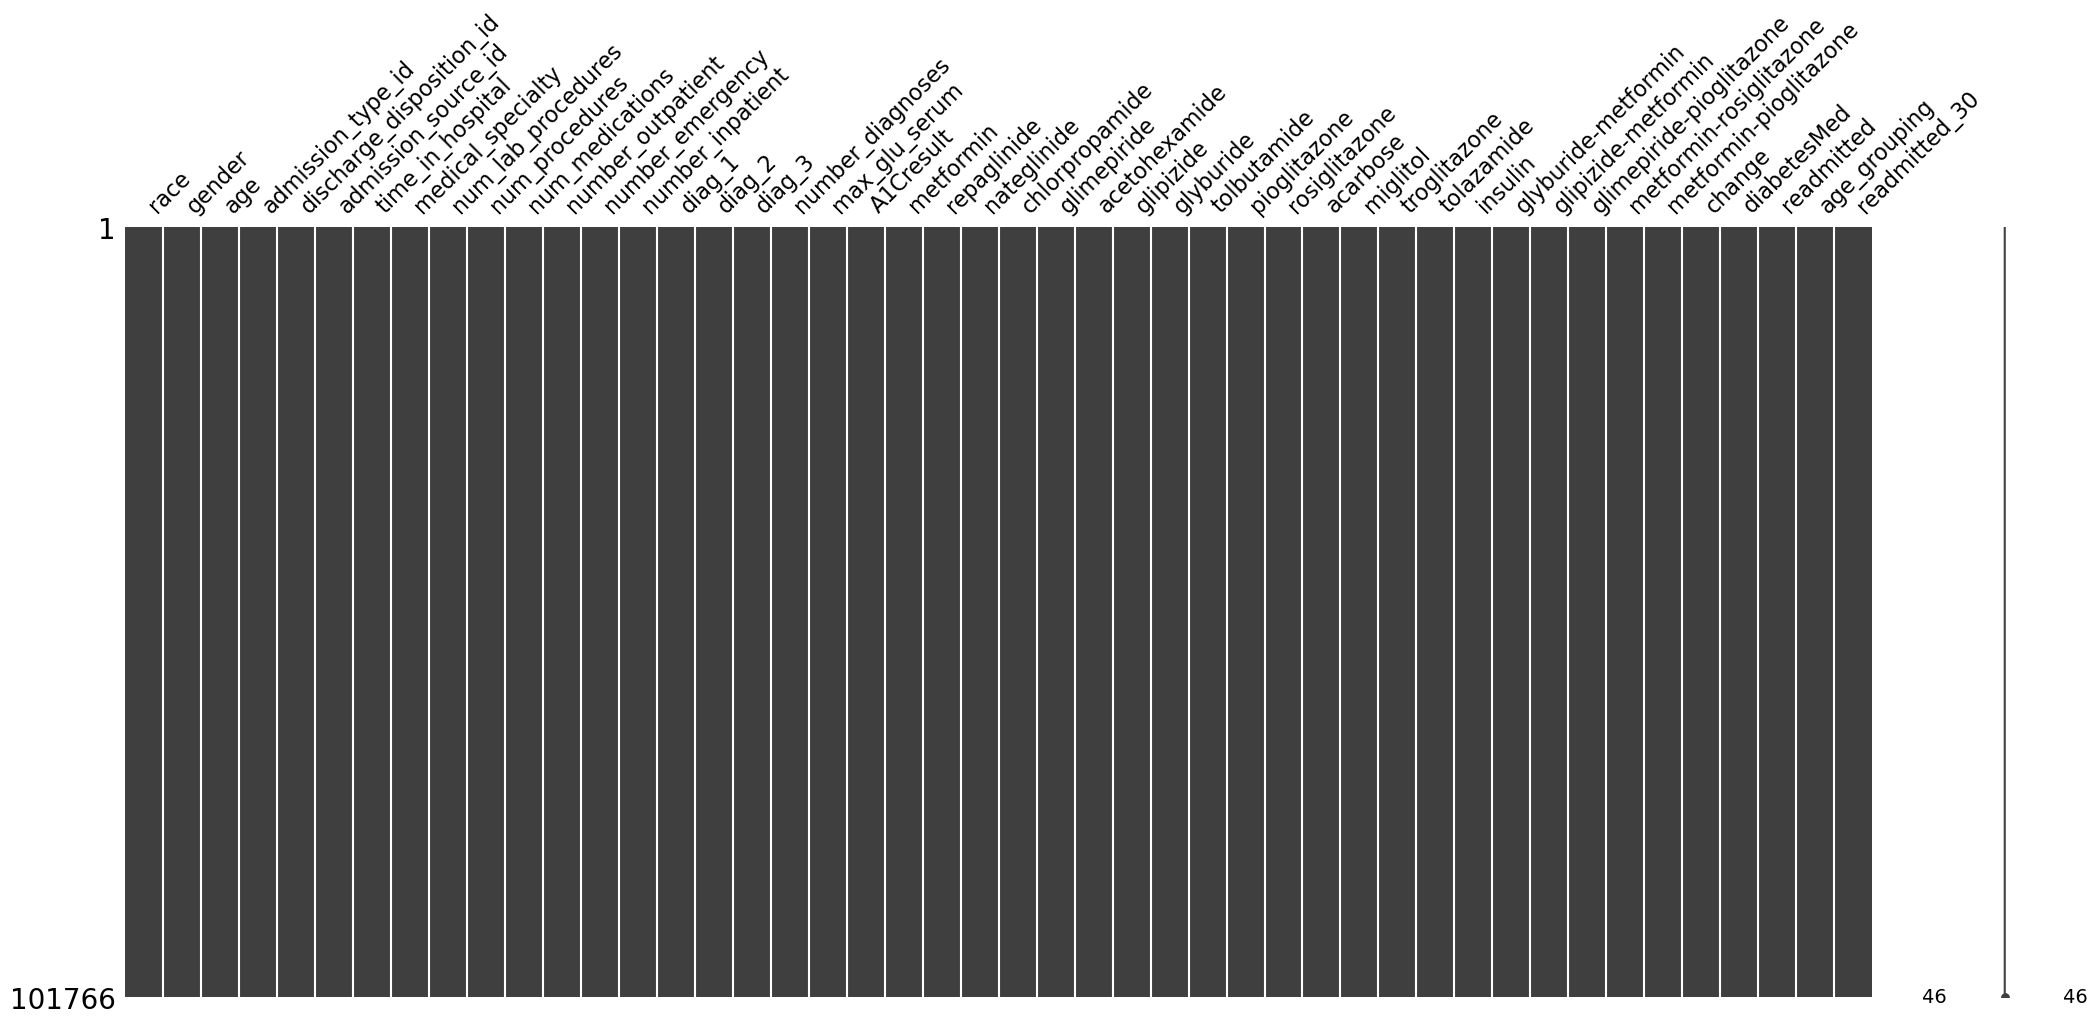

In [362]:
msno.matrix(diabetes)

* We don't have any missing values in our dataset.

# Numerical Features
* Look at the data elements (columns) using `diabetes.head()`
* Look at the Dtype (data type) using `diabetes.info()`

In [363]:
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_grouping,readmitted_30
0,3,1,1,999,999,9,1,7,5,0,...,999,999,999,999,999,0,0,0,1,0
1,3,1,2,2,2,5,3,999,6,0,...,999,999,999,999,999,1,1,1,1,0
2,1,1,3,2,2,5,2,999,2,5,...,999,999,999,999,999,0,1,0,1,0
3,3,2,4,2,2,5,2,999,5,1,...,999,999,999,999,999,1,1,0,2,0
4,3,2,5,2,2,5,1,999,6,0,...,999,999,999,999,999,1,1,0,2,0


In [364]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  diag_1              

In [365]:
diabetes.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_grouping,readmitted_30
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,39.621858,1.491805,7.096702,104.209333,51.805200,75.744866,4.395987,496.838247,4.869662,1.339730,...,992.069670,998.872384,998.990183,998.980367,998.990183,0.461952,0.770031,0.460881,2.427933,0.111599
std,188.408333,5.438970,1.594084,301.827564,208.037668,252.227496,2.985108,493.164910,1.962397,1.705807,...,82.916962,11.290423,3.131585,4.428708,3.131585,0.498553,0.420815,0.498470,0.542327,0.314874
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000,6.000000,2.000000,2.000000,5.000000,2.000000,11.000000,4.000000,0.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,3.000000,1.000000,7.000000,2.000000,2.000000,5.000000,4.000000,28.000000,5.000000,1.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,3.000000,2.000000,8.000000,5.000000,12.000000,9.000000,6.000000,999.000000,6.000000,2.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,1.000000,1.000000,1.000000,3.000000,0.000000
max,999.000000,999.000000,10.000000,999.000000,999.000000,999.000000,14.000000,999.000000,14.000000,6.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,1.000000,1.000000,1.000000,3.000000,1.000000


* We have all numerical features in our dataset.

* All of our numerical features are measured in different scales.

* Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

* Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

* Let's check out the skewness

### Skewness

In [366]:
diabetes.skew()

race                          4.895632
gender                      181.857272
age                          -0.630539
admission_type_id             2.627254
discharge_disposition_id      4.330042
admission_source_id           3.386854
time_in_hospital              1.133999
medical_specialty             0.035939
num_lab_procedures           -0.165053
num_procedures                1.316415
num_medications               1.065405
number_outpatient            16.087315
number_emergency             61.775009
number_inpatient              8.425210
diag_1                        0.577668
diag_2                        0.957578
diag_3                        1.066422
number_diagnoses             -0.876746
max_glu_serum                -4.011468
A1Cresult                    -1.783485
metformin                    -1.528347
repaglinide                  -7.946196
nateglinide                 -11.906754
chlorpropamide              -34.356399
glimepiride                  -4.081491
acetohexamide            

In [367]:
### Univariate Analysis

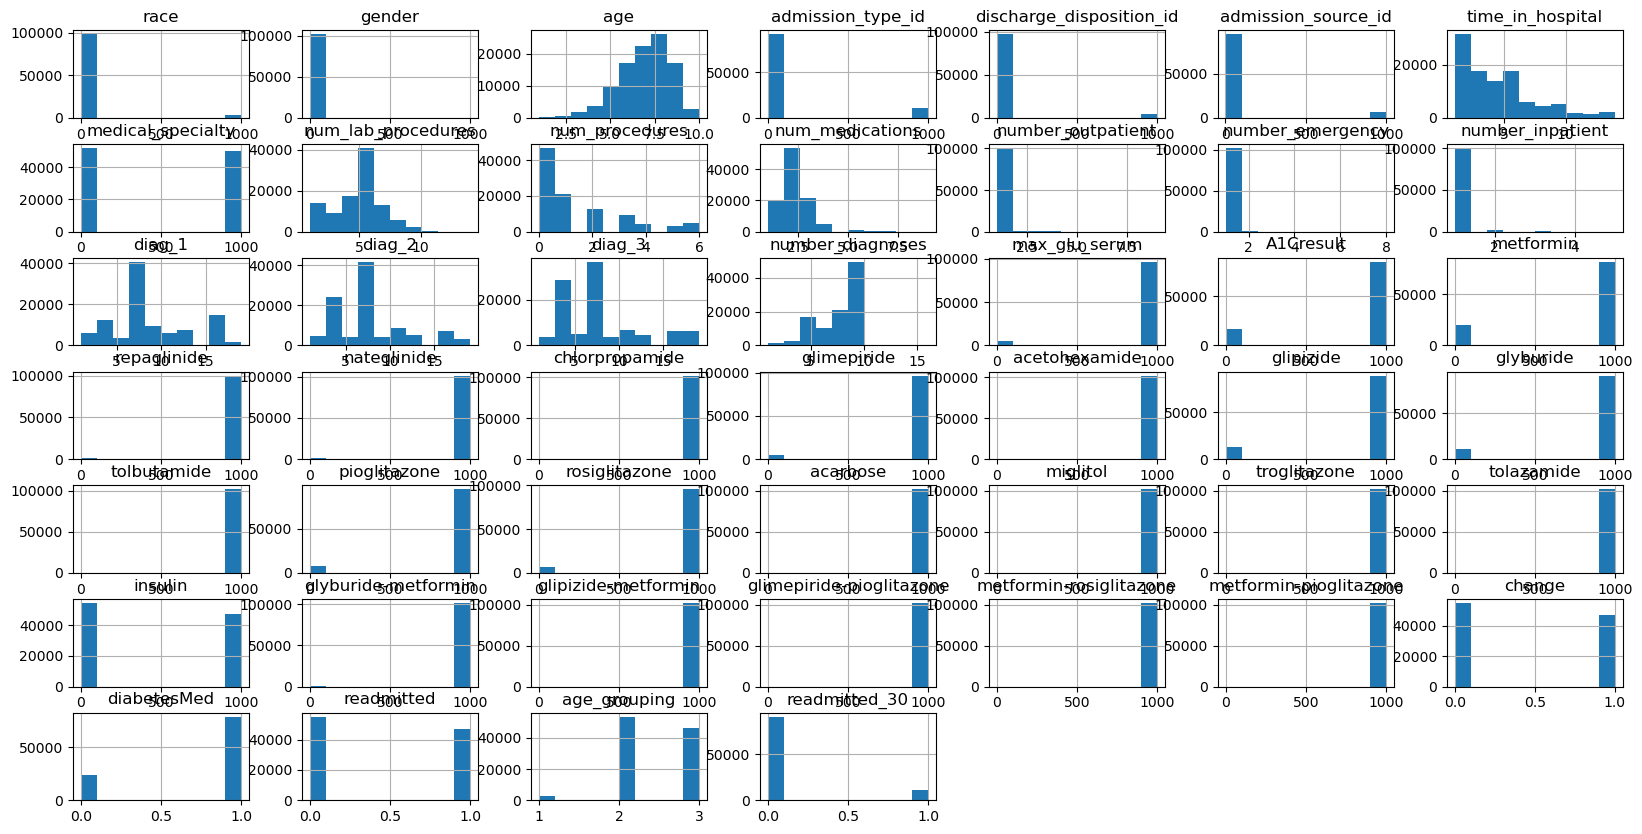

In [368]:
diabetes.hist(figsize=(20,10));

* As seen in both skewness result and histograms, numerical features have skewness in different degrees
* We will deal with different scale and skewness during the modeling by using standardization `Standard scaler`

### Correlation Matrix & Scatter Plots

In [369]:
diabetes.corr()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_grouping,readmitted_30
race,1.000000,0.028981,-0.012108,-0.015094,-0.018365,-0.004279,-0.007503,-0.000280,0.008257,0.006388,...,-0.014908,0.002197,0.000609,-0.022574,0.000609,0.017052,0.022102,-0.044244,-0.013748,-0.014644
gender,0.028981,1.000000,-0.002703,-0.001391,-0.001234,-0.000767,-0.004666,0.002477,-0.003622,0.009698,...,0.000113,-0.000577,0.000283,-0.000414,0.000283,0.003583,0.000132,-0.006650,-0.002594,-0.002183
age,-0.012108,-0.002703,1.000000,0.011752,-0.002291,0.024511,0.107515,0.046630,0.019613,-0.030104,...,0.001506,-0.002042,0.000190,-0.002512,0.000190,-0.036019,-0.022601,0.030403,0.860207,0.017634
admission_type_id,-0.015094,-0.001391,0.011752,1.000000,0.078921,0.662151,-0.017086,-0.044594,-0.054085,-0.006938,...,0.025109,0.003836,0.001062,0.001509,0.001072,-0.004835,-0.004662,0.023029,0.019620,-0.005364
discharge_disposition_id,-0.018365,-0.001234,-0.002291,0.078921,1.000000,0.016289,0.054152,0.066467,-0.006717,0.022184,...,0.018532,0.002309,0.000750,0.000955,0.000570,-0.060317,-0.061735,-0.019107,0.001462,0.005549
admission_source_id,-0.004279,-0.000767,0.024511,0.662151,0.016289,1.000000,-0.021926,-0.063798,-0.143391,0.000326,...,0.022835,0.003129,0.000879,0.001208,0.000830,0.001233,0.003866,0.002051,0.029558,-0.006038
time_in_hospital,-0.007503,-0.004666,0.107515,-0.017086,0.054152,-0.021926,1.000000,0.002947,0.317217,0.191472,...,0.002164,0.000626,0.002516,0.000588,-0.001684,0.109173,0.062520,0.051289,0.095231,0.044199
medical_specialty,-0.000280,0.002477,0.046630,-0.044594,0.066467,-0.063798,0.002947,1.000000,0.009666,-0.058281,...,0.000603,-0.009776,-0.003192,-0.004514,0.002993,-0.009375,-0.023328,0.038224,0.036934,0.012961
num_lab_procedures,0.008257,-0.003622,0.019613,-0.054085,-0.006717,-0.143391,0.317217,0.009666,1.000000,0.057830,...,0.010616,0.006781,0.001389,-0.001424,0.002987,0.063742,0.033124,0.040053,0.020545,0.021075
num_procedures,0.006388,0.009698,-0.030104,-0.006938,0.022184,0.000326,0.191472,-0.058281,0.057830,1.000000,...,0.001237,0.005309,0.002462,-0.004315,0.000624,0.004448,-0.006821,-0.044748,-0.047714,-0.012227


In [370]:
# sort correlation results by highest correlation
corr = diabetes.corr()
diabetes[diabetes.columns[1:]].corr()['readmitted_30'].sort_values(ascending=False)[:10]

readmitted_30         1.000000
readmitted            0.383331
number_inpatient      0.116680
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.036671
diabetesMed           0.027125
metformin             0.022908
num_lab_procedures    0.021075
change                0.019506
Name: readmitted_30, dtype: float64

In [371]:
diabetes.groupby('readmitted_30').mean()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_grouping
readmitted_30,,,,,,,,,,,,,,,,,,,,,
0,40.599741,1.496013,7.086739,104.783141,51.396023,76.284618,4.349224,494.572874,4.855003,1.347123,...,471.353350,992.060967,998.867403,998.98895,998.9779,998.98895,0.458505,0.765986,0.393158,2.424416
1,31.837281,1.458308,7.176015,99.641455,55.062517,71.448094,4.768249,514.872061,4.986352,1.280884,...,418.762173,992.138945,998.912037,999.00000,999.0000,999.00000,0.489390,0.802237,1.000000,2.455930


* It looks like there is a strong correlation between the following features:
  * Number of Inpatient Days
  * Number of Diagnoses
  * Time in Hospital
  * Number of Medications
  * Change in Diabetes Medication
  * Metformin
  * Number of Lab Procedures
  * Change in Medication

# Clean the Data (Feature Engineering)

## There are two options for cleaning this data.  
       1) Cleaning the .csv in Excel
       2) Cleaning the data in Python/Jupyter Notebook
              (We will show how to clean the data in the Notebook)
              
## You may skip this step if you clean your dataset in the .csv document

### What data are we going to do?
### 1) Drop unnecessary data
### 2) Check for duplicates
### 3) Check for missing data

### Step 1: Drop the columns that are either missing most of the times or are not relevant

* The `readmitted` column is the same as the `readmitted_30` column, so we can drop it.
* The `number_inpatient`, `diabetesMed`, `metformin`, `change` columns only had one value, so we can drop them.
* The rest of the columns have been kept for now.

In [372]:
# list all of the columns in the dataframe
diabetes.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_grouping', 'readmitted_30'],
      dtype='object')

In [373]:
# Dropping the columns which are not required
diabetes.drop(['num_lab_procedures', 'number_outpatient', 'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'], axis=1, inplace=True)

In [374]:
# Lets see what we just did
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,age_grouping,readmitted_30
0,3,1,1,999,999,9,1,7,0,1,1,1,3,19,19,1,999,1,0
1,3,1,2,2,2,5,3,999,0,2,1,1,3,3,3,9,999,1,0
2,1,1,3,2,2,5,2,999,5,2,1,1,11,3,19,6,999,1,0
3,3,2,4,2,2,5,2,999,1,2,1,1,1,3,7,7,999,2,0
4,3,2,5,2,2,5,1,999,0,1,1,1,2,2,3,5,999,2,0


### Step 3: Check for missing data

In [375]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_procedures            101766 non-null  int64
 9   num_medications           101766 non-null  int64
 10  number_emergency          101766 non-null  int64
 11  number_inpatient          101766 non-null  int64
 12  diag_1                    101766 non-null  int64
 13  diag_2                    101766 non-null  int64
 14  diag_3              

# Breaking the data up into Train & Test

In [376]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [377]:
diabetes.readmitted_30.value_counts()

0    90409
1    11357
Name: readmitted_30, dtype: int64

In [378]:
train_df.readmitted_30.value_counts()

0    63275
1     7961
Name: readmitted_30, dtype: int64

In [379]:
valid_df.readmitted_30.value_counts()

0    13520
1     1745
Name: readmitted_30, dtype: int64

In [380]:
test_df.readmitted_30.value_counts()

0    13614
1     1651
Name: readmitted_30, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [381]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the positive class in the complete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [382]:
# split the training data into positive and negative
rows_pos = train_df.readmitted_30 == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmitted_30.values)))

Train balanced prevalence(n = 15922):0.500


In [383]:
diabetes_df_balanced.readmitted_30.value_counts()

1    7961
0    7961
Name: readmitted_30, dtype: int64

In [384]:
X_train = diabetes_df_balanced.drop('readmitted_30',axis=1)

y_train = diabetes_df_balanced['readmitted_30']

X_valid = valid_df.drop('readmitted_30',axis=1)

y_valid = valid_df['readmitted_30']

X_test = test_df.drop('readmitted_30',axis=1)

y_test = test_df['readmitted_30']

In [385]:
# list columns in the dataframe
X_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping'],
      dtype='object')

In [386]:
scaler=StandardScaler()
X_train[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']] = pd.DataFrame(scaler.fit_transform(X_train[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']]), columns=['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping'])
X_valid[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']] = pd.DataFrame(scaler.transform(X_valid[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']]), columns=['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping'])
X_test[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']] = pd.DataFrame(scaler.transform(X_test[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping']]), columns=['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_procedures', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'age_grouping'])

# Creating and Understanding Models

In [387]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [388]:
## Linear Regression

In [389]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [390]:
y_valid_preds

array([0.52190512, 0.40212118, 0.57518144, ..., 0.50112464, 0.61971792,
       0.56269521])

## Logistic Regression

In [391]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.582
accuracy:0.581
recall:0.524
precision:0.141
specificity:0.588
prevalence:0.114
 


# Alternative Test Set Regression
*To see if a more drilled down version of the dataset would lead to a better result for the regression*

1. Need to create a duplicate dataframe to set up new train & test sets

In [392]:
# duplicate the diabetes dataframe to create a second one
diabetes_2nd_test_df = diabetes.copy()
# drop more columns from the dataset
diabetes_2nd_test_df.drop(['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'num_procedures', 'num_medications', 'number_emergency', 'number_inpatient', 'diag_2', 'diag_3', 'number_diagnoses', 'age_grouping'], axis=1, inplace=True)


In [393]:
diabetes_2nd_test_df.head()

,time_in_hospital,medical_specialty,diag_1,A1Cresult,readmitted_30
0,1,7,3,999,0
1,3,999,3,999,0
2,2,999,11,999,0
3,2,999,1,999,0
4,1,999,2,999,0


## Breaking the data up into Train & Test

In [394]:
train_df_2, valid_df_2, test_df_2 = np.split(diabetes_2nd_test_df.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes_2nd_test_df)), int(0.85*len(diabetes_2nd_test_df))])
train_df_2 = train_df_2.reset_index(drop = True)
valid_df_2 = valid_df_2.reset_index(drop = True)
test_df_2 = test_df_2.reset_index(drop = True)

In [395]:
diabetes_2nd_test_df.readmitted_30.value_counts()

0    90409
1    11357
Name: readmitted_30, dtype: int64

In [396]:
train_df_2.readmitted_30.value_counts()

0    63275
1     7961
Name: readmitted_30, dtype: int64

In [397]:
valid_df_2.readmitted_30.value_counts()

0    13520
1     1745
Name: readmitted_30, dtype: int64

In [398]:
test_df_2.readmitted_30.value_counts()

0    13614
1     1651
Name: readmitted_30, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [399]:
def calc_prevalence(y_actual_2):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the positive class in the complete data.
    '''
    
    return (sum(y_actual_2)/len(y_actual_2))

In [400]:
# split the training data into positive and negative
rows_pos_2 = train_df_2.readmitted_30 == 1
df_train_pos_2 = train_df_2.loc[rows_pos]
df_train_neg_2 = train_df_2.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced_2 = pd.concat([df_train_pos_2, df_train_neg_2.sample(n = len(df_train_pos_2), random_state = 111)],axis = 0)

# shuffle the order of training samples 
diabetes_df_balanced_2 = diabetes_df_balanced_2.sample(n = len(diabetes_df_balanced_2), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced_2), \
                                                calc_prevalence(diabetes_df_balanced_2.readmitted_30.values)))

Train balanced prevalence(n = 15922):0.500


In [401]:
diabetes_df_balanced_2.readmitted_30.value_counts()

1    7961
0    7961
Name: readmitted_30, dtype: int64

In [402]:
X_train_2 = diabetes_df_balanced_2.drop('readmitted_30',axis=1)

y_train_2 = diabetes_df_balanced_2['readmitted_30']

X_valid_2 = valid_df_2.drop('readmitted_30',axis=1)

y_valid_2 = valid_df_2['readmitted_30']

X_test_2 = test_df_2.drop('readmitted_30',axis=1)

y_test_2 = test_df_2['readmitted_30']

In [403]:
X_train_2.columns

Index(['time_in_hospital', 'medical_specialty', 'diag_1', 'A1Cresult'], dtype='object')

In [404]:
scaler=StandardScaler()
X_train_2[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']] = pd.DataFrame(scaler.fit_transform(X_train[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']]), 
       columns=['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult'])
X_valid_2[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']] = pd.DataFrame(scaler.transform(X_valid[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']]), 
       columns=['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult'])
X_test_2[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']] = pd.DataFrame(scaler.transform(X_test[['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult']]), 
       columns=['time_in_hospital', 'medical_specialty','diag_1', 'A1Cresult'])

In [405]:
# Creating and Understanding Models

In [406]:
def calc_specificity(y_actual_2, y_pred_2, thresh_2):
    # calculates specificity
    return sum((y_pred_2 < thresh_2) & (y_actual_2 == 0)) /sum(y_actual_2 ==0)

def print_report(y_actual_2, y_pred_2, thresh_2 = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc_2 = roc_auc_score(y_actual_2, y_pred_2)
    accuracy_2 = accuracy_score(y_actual_2, (y_pred_2 > thresh_2))
    recall_2 = recall_score(y_actual_2, (y_pred_2 > thresh_2))
    precision_2 = precision_score(y_actual_2, (y_pred_2 > thresh_2))
    specificity_2 = calc_specificity(y_actual_2, y_pred_2, thresh_2)
    print('AUC:%.3f'%auc_2)
    print('accuracy:%.3f'%accuracy_2)
    print('recall:%.3f'%recall_2)
    print('precision:%.3f'%precision_2)
    print('specificity:%.3f'%specificity_2)
    print('prevalence:%.3f'%calc_prevalence(y_actual_2))
    print(' ')
    return auc_2, accuracy_2, recall_2, precision_2, specificity_2

## Linear Regression

In [407]:
lnr = LinearRegression()
lnr.fit(X_train_2, y_train_2)


y_valid_preds_2 = lnr.predict(X_valid_2)

In [408]:
y_valid_preds_2

array([0.46502546, 0.47189539, 0.54937356, ..., 0.52244359, 0.44772456,
       0.52520273])

In [409]:
## Logistic Regression

In [410]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train_2, y_train_2)

y_valid_preds_2 = lr.predict_proba(X_valid_2)[:,1]

print('Metrics for Validation data:')

lr_valid_auc_2, lr_valid_accuracy_2, lr_valid_recall_2, \
    lr_valid_precision_2, lr_valid_specificity_2 = print_report(y_valid_2,y_valid_preds_2, 0.5)

Metrics for Validation data:
AUC:0.544
accuracy:0.580
recall:0.472
precision:0.130
specificity:0.594
prevalence:0.114
 
